# Milestone Project : P2

Laurine Planat - Team PAM

Here we will focus on the paper named "**Signed Networks in Social Media**", publishedd the 10-15th of April 2010 at Atlan, GA, USA, during the 2010 CHI (Confererence on Human Factors in Computing Systems) in the Machine Learning and Web Interactions chaper, by Jure Leskovec, Daniel Huttenlocher and John Kleinberg. 

The original paper can be found <a href = https://cs.stanford.edu/people/jure/pubs/triads-chi10.pdf>here</a>, and the data used in the study can be found <a href = https://drive.google.com/drive/folders/1r_K-XMqu5OW9vieoqNgzOTw2GA1hVVzc>here</a>.

#### Introduction

Let's have a small introduction about the paper, to remind us of the subject and the context of the study.
Nowadays, one of the major strikes in both scientific and societal fields is Social Network understanding. Most of the research in that field have considered only the positive **or** the negative edges to compute their analysis. The particularity of this paper is that **it focuses on the interaction between the two types of edges** and how it shapes the network structure. It is conducted through the prism of social psychology, comparing two major theories: the structural balance (both weak -Davis- and strong -Heider- version) and the status theory. 
In this study,  three Online Networks are used:
- The “*trust network of Epinions*" (where users can create signed relation with each other as an indication of trust or distrust) [referred to as **Epinion** in the following explanations]
- The “*Social network of technology blog Slashdot*” (where users can use signed links to designate other people either as friend or foe) [referred as  **Slashdot**] 
- The *Wikipedia votes for admin nomination* (when a user is considered to become an admin, the entire community can vote against or in favor of this nomination, so each vote is considered as positive -favor- or negative -against- link between users) [referred as **Wikipedia**] 

In this part of the project, we will focus on reproducing **the first part of their results**, which consists to enumerate the number of edges and nodes as well as the percentage of +/- edges and number of triads for each network considered.
Here is presented the table from the paper we want to reproduce : 

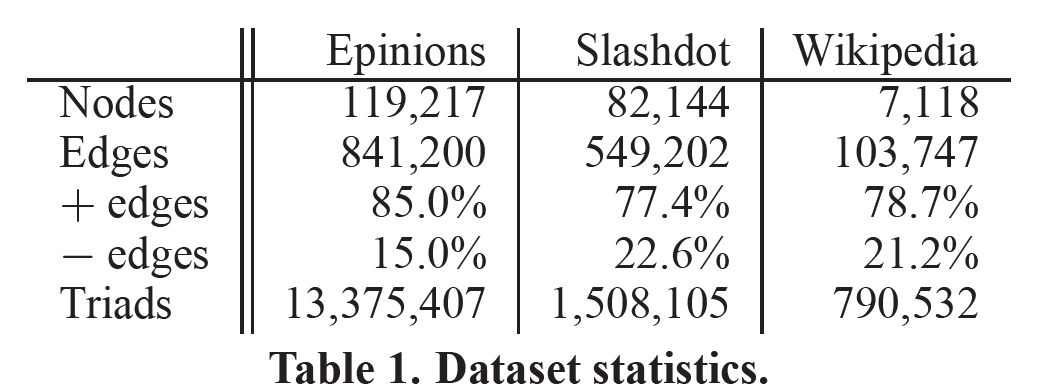

In [2]:
from IPython.display import Image
Image('./Data/Table1.PNG', width=400,height=600)

We have divided the analysis into 4 steps: first the importation of the data, then the analysis of signed edges percentages, next analysis of the triads, and finally a comparison with the results of the paper. 

## Step 0 : Create the result DataFrame

Let's import some useful libraries.

In [5]:
import pandas as pd
import numpy as np

In the first place, we create a DataFrame that will contain our results. Each column corresponds to a network, and the rows correspond respectively to the number of nodes and edges, the percentage of positive and negative edges, and the number of closed triads. We have built this structure based on the one proposed in a paper. Also, using a DataFrame it will be easy to add another column in case of the extension of the study to another network or an extra row in case of further analysis. 
All along with the following steps, we will add information to it. 

In [91]:
# Creation of Result DataFrame, which will be completed along the steps
Result = pd.DataFrame(columns=['Epinion', 'Slashdot', 'Wikipedia'], index=['Nodes', 'Edges', 'P_edges', 'N_edges', 'Triads'])

Result.fillna(0.0, inplace = True) #fill it with decimal zero values

Result

,Epinion,Slashdot,Wikipedia
Nodes,0.0,0.0,0.0
Edges,0.0,0.0,0.0
P_edges,0.0,0.0,0.0
N_edges,0.0,0.0,0.0
Triads,0.0,0.0,0.0


## Step 1 : Import the data

Then let’s build the file path to each of the data networks in order to easily access the data. 

In [7]:
DATAFOLDER = 'Data/'
Epinion_file = DATAFOLDER + 'soc-sign-epinions.txt'
Slashdot_file = DATAFOLDER + 'soc-sign-Slashdot090221.txt'
Wiki_file = DATAFOLDER + 'wikiElec.ElecBs3.txt'

Then we will treat each of the Network separately. For each of the step, to have some coherency in our study we will use the same order : first Epinion, then Slashdot and finally Wikipedia network.

### Epinion data

Here we will import the Epinion network data. As one can see having a look at the row file, the first four lines contain the general information about the Epinion Network and the rest of the lines contains the actual information on the links. To easily store and access the data, we have chosen to split the importation: in a first DataFrame, the **information about the nodes and edges**, and then focus on the first line of the raw file and the **general information** they contain.

--- Nodes, Edges information ----

First, we open the data file. To do so, we give some parameter to the *read* method : 
- Note that the delimitator between information in the file is a white space, so we set “True” to the argument “delim_whitespace”. 
- As said before, the first four lines of the file contain the general information and we will upload them later. Here we want to construct a DataFrame with only the nodes and edges information of the network. So we set “skiprows” to 4 and “nrows” to 841376 as it is the index of the last row of the file. Be careful, the number of edges is thus 841372-4=841372
- We assumed that the weird data were ignored in the paper as there was no mention of them (we set “False” to “error_bad_lines”)

Finally, we define the name of the columns, according to the structure of the file. Here are presented the first five lines of the  Epinion network values. So basically, each line corresponds to a link. The column "*FromNodeId*" contains the identification number of the sender node, will the column "*ToNodeId* contains the identification number of the receiver node. The sign "1" corresponds to a positive link will the sign "-1" corresponds to a negative one.

In [8]:
# Epinion : Importation of edges and nodes information 
Epinion_values = pd.read_csv(Epinion_file, delim_whitespace=True, header = None, skiprows=4, nrows=841376, error_bad_lines = False)

Epinion_values.columns = ['FromNodeId','ToNodeId','Sign'] # definition columns name
Epinion_values.head()

,FromNodeId,ToNodeId,Sign
0,0,1,-1
1,1,128552,-1
2,2,3,1
3,4,5,-1
4,4,155,-1


--- General information ---

Then we pay attention to the first four lines previously skipped. Indeed they contain the *total number of edges* and the *total number of nodes* of the network. 

We first read the Epinion file again but skipping only the two first lines (containing description) and focus on the third line. As before, the delimitator is white space and we ignore the weird data. As we want to do a check about these values later, we want to easily access and nicely present them: so we choose to create a DataFrame.

Here is presented the resulting DataFrame, containing the number of nodes and edges for the Epinion network. 

In [9]:
# Epinion : Importation of general information
Epinion_Global_info= pd.read_csv(Epinion_file, delim_whitespace=True, header = None, skiprows=2, nrows=1, error_bad_lines = False)

# Creation of the DataFrame containing general information
Epinion_G = pd.DataFrame(np.array([[Epinion_Global_info.iloc[0][2], Epinion_Global_info.iloc[0][4]]]),
                         columns=['Nodes', 'Edges'], index=['Counts'])
Epinion_G

,Nodes,Edges
Counts,131828,841372


--- Check of information ---

As the *total number of edges and nodes* is taken from the general information part of the file, we want to make sure we actually have imported all the nodes and edges. 

First, we check the number of edges, comparing the *total number of edges* given in the general information and the number of rows of the DataFrame containing the Epinion values imported. 

In [10]:
#Check the number of edges
if Epinion_G.iloc[0][1] == len(Epinion_values):
    print('Edges: General information corresponds to number of edges imported')
else: 
    print('Edges: General information DOES NOT correspond to number of edges imported')


Edges: General information corresponds to number of edges imported


Then we check the number of nodes. To do so we first define a function, called “*spot()*” taking two lists in parameter and saying if some element from the first one miss in the second one or the reverse situation.  

In [11]:
# Check the number of nodes

# Definition of func
def spot(listA, listB):
    setA = set(listA)
    setB = set(listB)
    for a in setA: 
        if not(a in setB):
            print(a, ' of list1 isn t in list2')
    for b in setB:
        if not(b in setA):
            print(b, 'of the list 2 isn t in list1')

Then we set the first list as all the integers between 0 and 131828, which is the *total number of nodes* given in the global information. The second list is defined as a combination of the sending nodes (FromNodeId) and the receptive nodes (ToNodeId), dropping the repeated ones. Then we applied the previously defined function, *spot()*. As no nodes from the second list are tagged as missing in the first one, we can say that all the nodes between 0 and 131828 are effectively present. Also as no nodes from the second list are tagged as missing in the first one, we can say that there are no extra nodes, outside the [0, 131828] range. 

In [14]:
# Check the number of nodes (cont.)

list1 = range(0, Epinion_G['Nodes'][0]) #131828 is the number of nodes given in the general information

E_Sending_nodes = set(np.array(Epinion_values['FromNodeId']))
E_Receiver_nodes = set(np.array(Epinion_values['ToNodeId']))

E_Senders_not_in_Receivers = list(E_Sending_nodes-E_Receiver_nodes)
E_Receiver_nodes = list(E_Receiver_nodes)

E_Total_nodes = E_Receiver_nodes + E_Senders_not_in_Receivers
spot(list1, E_Total_nodes)

To ensure the previous conclusion, we finally compare the length of the two lists. 

In [17]:
# Check the number of nodes (cont.)

if len(list1) == len(E_Total_nodes):
    print('Nodes: General information corresponds to number of nodes imported')
else : 
    print('Nodes: General information DOES NOT correspond to number of nodes imported')


Nodes: General information corresponds to number of nodes imported


--- Comparison with the paper results --- 

So finally, we get 131828 nodes and 841372 edges. The result values from the paper for the Epinion networks are 119 217 nodes and 841 200 edges. The gap is 12611 nodes which represent 10,6% of the total expected number from the paper. The gap is 172 edges which represent 0.02 % of the expected number: from the paper.

In fact, in the paper, they have perhaps done some selections on nodes and edges we are not aware of (selection on the number of edges, the participation in triads). From the comparison between the raw data imported and the general information from the first part of the file, one can say it is coherent. So based on what we know from the data and what the paper said, we think this result is acceptable. Also, error percentages are quite acceptable. So we will continue to work on this basis. We can thus push these values in the Result DataFrame. 

In [92]:
# Complet the Result DataFrame
Result['Epinion']['Nodes'] = Epinion_G['Nodes'][0]
Result['Epinion']['Edges'] = Epinion_G['Edges'][0]
Result

,Epinion,Slashdot,Wikipedia
Nodes,131828.0,0.0,0.0
Edges,841372.0,0.0,0.0
P_edges,0.0,0.0,0.0
N_edges,0.0,0.0,0.0
Triads,0.0,0.0,0.0


### Slashdot data

Here we will import the Slashdot network data. As the structure of this file is similar to the Epinion one, we will use the same strategy to import information: first a DataFrame with links information and then a second DataFrame with general information.

--- Nodes, Edges information --- 

First, we open the file, using specific parameters, similar to Epinion ones : 
- The delimitator between information in the file is also white space. 
- As said before, the structure of the raw file is the same as for the Epinion network. So we also skip the four first lines to have only information about the links and not the general ones (which will be treated later): the "skiprows" is set at 4 and the "nrows” is set as 549206 as it is the index of the last line of the file. Same, the number of edges is 549206 – 4 = 549204
- As in the Epinion network, we assumed that the weird data were ignored

Finally, we define the name of the columns, similar to the Epinions DataFrame structure as the files have equivalent shapes. Here are presented the first five lines of the  Slashdot network values. The meaning of the columns is the same as for Epinion Network previously imported. 

In [19]:
# Slashdot : Importation of edges and nodes information
Slashdot_values = pd.read_csv(Slashdot_file, delim_whitespace=True, header = None, skiprows=4, nrows=549206, error_bad_lines = False)

Slashdot_values.columns = ['FromNodeId','ToNodeId','Sign'] # Definition of columns
Slashdot_values.head()

,FromNodeId,ToNodeId,Sign
0,0,1,1
1,0,2,1
2,0,3,1
3,0,4,1
4,0,5,1


--- General information --- 

Here we focus on the four lines containing the general information : which are the *total number of edges* and *total number of nodes* of the slashdot network. 

The logic is similar to Epinion's general information importation. First, we read the Slashdot file again but focusing on line 3 (delimitator is still white space and weird data still ignored). Then we build a DataFrame to make these values easily accessible. Here it is presented. 

In [20]:
#Slashdot : Importation of general information
Slashdot_Global_info= pd.read_csv(Slashdot_file, delim_whitespace=True, header = None, skiprows=2, nrows=1, error_bad_lines = False)

# Creation of the DataFrame containing general information
Slashdot_G = pd.DataFrame(np.array([[Slashdot_Global_info.iloc[0][2], Slashdot_Global_info.iloc[0][4]]]),
                                   columns=['Nodes', 'Edges'], index=['counts'])
Slashdot_G

,Nodes,Edges
counts,82144,549202


--- Check of information --- 

As the structure of the row file is the same as for Epinion networks, we want to check the general information given to make sure we didn’t miss anything during the importation.

To do so, we use the same strategy as before. First comparing the length of DataFrame containing the imported rows to the *total number of edges* given in the general first part.

In [21]:
# Check the number of edges

if Slashdot_G.iloc[0][1] == len(Slashdot_values):
    print('Edges: General information corresponds to number of edges imported')
else: 
    print('Edges : General information DOES NOT correspond to number of edges imported')


Edges: General information corresponds to number of edges imported


Second, we use the *spot()* function previously defined. We create a list of all integers between 0 and 82144 (the total number of nodes according to *general information*), then we create a Node List as a combination of both sending and receiving nodes (*FromNodeId* and *ToNodeId*), avoiding doubles.  

The *spot()* function reveals that four values are missing in the Nodes List: this means that the nodes 11680, 73373, 78482, and 79625 **don’t have any connections and thus are not indexed in the links**. However, as there are no missing values from the Node List in the first list, it means that all the nodes indexed in the links are part of the range [0, 82144]. The length comparison gives the same result. 

Here we choose to keep the **total number of edges and nodes** to continue our analysis (especially for percentage computing). Even if these specific nodes are not involved in any edges, they are still part of the network, and there is no indication in the paper about removing them. So we keep them in our counting.

This checkpoint helped us to modulate our appreciation of the results. Compared to the Epinions networks where all the nodes are involved, here some are excluded from the links, so edges distribution begins at 0 edges in the Slashdot network, while it begins at 1 edge in the Epinion one. 


In [22]:
# Check the number of nodes
list2 = range(0, Slashdot_G['Nodes'][0]) #82144 is the number of nodes given in the general information

S_Sending_nodes = set(np.array(Slashdot_values['FromNodeId']))
S_receiving_nodes = set(np.array(Slashdot_values['ToNodeId']))

S_Senders_not_in_Receivers = list(S_Sending_nodes - S_receiving_nodes)
S_receiving_nodes = list(S_receiving_nodes)

S_Total_nodes = S_receiving_nodes + S_Senders_not_in_Receivers
spot(list2, S_Total_nodes)

11680  of list1 isn t in list2
73373  of list1 isn t in list2
78482  of list1 isn t in list2
79625  of list1 isn t in list2


The comparison of the length gives the same results : some of the nodes are not involved. 

In [24]:
# Check the number of nodes (cont.)

if len(list1) == len(S_Total_nodes):
    print('Nodes: General information corresponds to number of nodes imported')
else : 
    print('Edges : General information corresponds to number of nodes imported : some nodes are not involved in any edges')


Edges : General information corresponds to number of nodes imported : some nodes are not involved in any edges


--- Comparison with the paper results --- 

So finally we get the 82144 nodes and 549202 edges. Regarding the table from the paper, **these values correspond exactly to the expected ones**. Thus we can continue on this basis.

We can thus push these values in the Result DataFrame. 

In [93]:
# Complet the Result DataFrame
Result['Slashdot']['Nodes'] = Slashdot_G['Nodes'][0] 
Result['Slashdot']['Edges'] = Slashdot_G['Edges'][0]
Result

,Epinion,Slashdot,Wikipedia
Nodes,131828.0,82144.0,0.0
Edges,841372.0,549202.0,0.0
P_edges,0.0,0.0,0.0
N_edges,0.0,0.0,0.0
Triads,0.0,0.0,0.0


 ### Wikipedia Admin votes

First of all, as explained in the “README” file associated with the data, the Wikipedia file is not structured as a usual CSV, so the first step will be to parse it. 

--- Construction of the organized DataFrame ---

To understand the logic we have used to organize the data in a DataFrame, let’s first explain the organization of the raw file. The first six lines give general information about the legend used. Then it is composed of blocks with the following structure 
- Line 1: tells if the election is successful or not (1 or 0)
- Line 2: tells the time the election closed
- Line 3: gives the name of the used considered for promotion
- Line 4: gives the name of the user nominator
- Line 4 + i: votes, with the “V” (for vote), the nature of the vote (-1, +1, 0), the time of the vote, and the name of the user voter. 

For each different candidate, there is a new block. 

First, we open the file, with the mode “*rt*” for reading text. The type of encoding is “*utf-8*” as it is Wikipedia data and we assumed we could ignore the weird data, as for the other networks. 

We stock each line of the raw file in a temporary structure (*mylines*). We then check if the number of lines of this temporary structure corresponds to the last index of the raw file, to make sure we correctly imported the rows, which is the case.

Then we print a line of this temporary structure, one can see that the delimitator used here is “\t”. Next, we spot each "*Candidate*" line (indexed by "*U*") and we split the associated "*Vote*" lines using "\t" as the delimitator. For each of these "*Vote*" line, we add the associated candidate ID as extra information. 

Finally, we push this information into a DataFrame and rename the columns. For a more simple comparison with the other network, we choose to use the same structure "FromNodeID", "ToNodeId" and "Sign" as before. So we drop the column containing  “V” (it is not useful here: all the raws contain a “V” because we want to index only the votes) the date and the name of the voters. We will only use their ID number, for users (voters and candidates) to make things easier.

Each vote is considered as a link from the voter to the candidate, positive if the vote was in favor or negative if it was against. So the structure of the DataFrame is "*ID_voter*" (corresponding to "*FromNodeId*"), "*ID_candidate*" (corresponding to "*ToNodeId*"), and "*Sign*".
Here is presented the resulting DataFrame. 

In [26]:
# Organisation Wikipedia data set: opening and importing od the raw file 
Wikipedia_raw = open("Data/wikiElec.ElecBs3.txt", mode='rt', encoding="utf-8", errors="ignore")
mylines=[] #temporary set of the raw wikipedia lines 

for line in Wikipedia_raw:
    mylines.append(line)

In [27]:
# Organisation Wikipedia data set (cont.)

#Check the length of the lines implemented from wikipedia raw
len(mylines) # indeed, corresponds to the last index of the raw file 

128016

In [28]:
# Organisation Wikipedia data set (cont.)

#Example of a line implemented. \t are the separators we will use in the dataframe construction
mylines[15]

'V\t1\t7\t2004-09-14 19:37:00\ttexture\n'

In [29]:
# Organisation Wikipedia data set (cont.)

#Process mylines to organize information in a dataframe
Wiki_votes= pd.DataFrame()
for i in range(6, 128015): #128015 corresponds to the final index of the file 
    if mylines[i][0] == "U": # Case of a new candidate
        line_d = mylines[i].split("\t")
        dest = line_d[1] # dest : Candidate ID
        j = 2
        while mylines[i+j][0] == "V" and (i+j)<=len(mylines):
            line_v = mylines[i+j].split("\t") #split the line
            line_v.append(dest) # add the candidate ID information
            Vv = pd.DataFrame(np.array([line_v]))
            Wiki_votes = Wiki_votes.append(Vv, ignore_index=True) # add the new vote to the DataFrame containing all the votes
            j += 1

In [33]:
# Organisation Wikipedia data set (cont.)

# Label of columns, suppression of useless ones
Wiki_votes.columns =['V', 'Sign','ID_voter','Date', 'Name_voter', 'ID_candidate']
Wiki_votes = Wiki_votes.drop(['V', 'Date', 'Name_voter'], axis=1)
Wiki_votes = Wiki_votes.reindex(columns = ['ID_voter', 'ID_candidate', 'Sign'])
Wiki_votes.head()

,ID_voter,ID_candidate,Sign
0,3,30,1
1,25,30,-1
2,4,30,1
3,5,30,1
4,6,30,1


Finally, we transform the type of the values contained in the DataFrame into numeric ones (string before) to be able to compute them later. 

In [35]:
# Wikipedia : transformation into numerical values
Wiki_votes.Sign = pd.to_numeric(Wiki_votes.Sign)
Wiki_votes.ID_voter = pd.to_numeric(Wiki_votes.ID_voter)
Wiki_votes.ID_candidate = pd.to_numeric(Wiki_votes.ID_candidate)

--- General information --- 

Then we compute information to find the total number of nodes and edges. On the contrary of Epinion and Slashdot networks, **this information is not given in the first part of the file. So we have to compute it ourselves.** 

First, let’s compute the *number of nodes*. To do so, we count the number of different voters and the number of different candidates. We add these two lists and we drop the duplicates (in case the candidate was also a voter, to no count it double time). 

In [36]:
# Wikipedia : compute the number of nodes 
Voters = Wiki_votes.ID_voter.drop_duplicates()
Candidates = Wiki_votes.ID_candidate.drop_duplicates()
Total = list(Voters) + list(Candidates)
Wiki_nodes = list(dict.fromkeys(Total))
print("The number of nodes is : {} .".format(len(Wiki_nodes)))


The number of nodes is : 7194 .


Second, let’s compute *the number of edges*. To do so we apply the len() function to the previously defined DataFrame. In fact, each line corresponds to a different vote. 

In [37]:
# Wikipedia : compute the number of edges
print("The number of edges is {} .".format(len(Wiki_votes)))

The number of edges is 114040 .


The results are pushed in a DataFrame, to be easily accessible. 

In [38]:
# Wikipedia : create DataFrame with general information
Wiki_G = pd.DataFrame(np.array([[len(Wiki_nodes), len(Wiki_votes)]]), columns=['Nodes','Edges'], index=['Counts'])
Wiki_G

,Nodes,Edges
Counts,7194,114040


As this general information (*total number of edges* and *nodes*) were computed and not given in the first part of the file, we will only be able to compare them with the values given in the paper.

--- Comparison with the paper results --- 

So finally we get 7194 nodes and 114040 edges. The expected values from the paper are 7 118 nodes and 103 747 edges. So the gap is 76  nodes and 10293 edges, which correspond respectively to 1.07% and 9.92%.

A way to explain this difference might be that they don't take into account neutral votes in the study. Which means that they count neither the nodes implied in the neutral votes, neither the associated links.
Here we are computing the total number of nodes and edges if we don't take into account the neutral votes. 

First we create a copy of the Wikipedia original dataframe, as we want to keep the information containing neutral votes unchanged. 

In [39]:
# Wikipedia : Creation of a Votes copy
Wiki_copy = Wiki_votes.copy()

Here is the line 11, which corresponds to a neutral vote (sign = "0"). We will use it to ensure our dropping method works. 

In [40]:
Wiki_copy.iloc[11] # corresponding to neutral vote

ID_voter        28
ID_candidate    30
Sign             0
Name: 11, dtype: int64

In [41]:
# Wikipedia : drop the neutral votes
Wiki_copy = Wiki_copy.drop(Wiki_copy[Wiki_copy['Sign'] == 0].index) # drop the neutral votes

In [42]:
Wiki_copy.iloc[11] 

ID_voter        13
ID_candidate    30
Sign             1
Name: 14, dtype: int64

One can see that the line 11 is not associated with neutral vote anymore ("Sing == 1"), so the "*drop()*" function worked. 

Then we use the same logic as before to count the nodes

In [43]:
# Wikipedia : nodes counts, without neutral votes 

Voters_copy = Wiki_copy.ID_voter.drop_duplicates()
Candidates_copy = Wiki_copy.ID_candidate.drop_duplicates()
Total_copy = list(Voters_copy) + list(Candidates_copy)
Wiki_nodes_copy = list(dict.fromkeys(Total_copy))
print("The number of nodes is : {} .".format(len(Wiki_nodes_copy)))

The number of nodes is : 7118 .


Here we can see that we obtain the exact same number as in the paper. 

In [44]:
print("The number of edges is : {}".format(len(Wiki_copy)))

The number of edges is : 107080


Here we can see that we obtain 107080 edges, while the expected number is 103 747. Even if it is not the same, it is definitively closer than the previous result (gap: 3.021%).
The remaining difference may come ffrom dropping of duplicates. That means if a user has vote several times for the same candidates. The link between this user and the candidate may be considered as single. Here we are trying this hypothesis. 

In [88]:
# Wikipedia : drop of duplicated votes 
Wiki_copy= Wiki_copy.drop_duplicates(subset=['ID_voter', 'ID_candidate'],keep='last')
print("Now, the total number of edges for wikipedia dataset is : {}".format(len(Wiki_copy)))

Now, the total number of edges for wikipedia dataset is : 103747


So finally we can see that **we get the same value as the paper**. Thus neither the neutral edges nor the multiples votes were counted. 

However, here we have chosen to all the results, and the associated logic of thoughts, because nothing was clearly said in the paper about getting rid of neutral edges and mutliples votes, and as part of the network it seems to us quite important. However, according to the results (nodes number) and the associated error gaps, it appears that they seem to not use neutral votes in the study. So we will use the values without neutral votes in our result DataFrame (minimization of error gap in the results).

However, we will also present both results for percentage analysis (with neutral and multiple votes and without), as nothing was indicated in the paper. The values, with and without, are not very far (neither for nodes/edges count nor for the percentages) thus it doesn't change the global conclusion we can draw using the results. 

In [94]:
# Complet the Result DataFrame
Result['Wikipedia']['Nodes'] = len(Wiki_nodes_copy)
Result['Wikipedia']['Edges'] = len(Wiki_copy)
Result

,Epinion,Slashdot,Wikipedia
Nodes,131828.0,82144.0,7118.0
Edges,841372.0,549202.0,103747.0
P_edges,0.0,0.0,0.0
N_edges,0.0,0.0,0.0
Triads,0.0,0.0,0.0


## Step 2 : Percentage Analysis

Here we will focus on the **computing of the percentage of positive and negative edges for each of the network**. For more clarity, let’s keep the same order in network analysis.  

### Epinion data

--- Compute the percentages ---

Here is a small reminder of what the Epinion DataFrame looks like.

In [77]:
# Epinion DataFrame : Reminder
Epinion_values.head()

,FromNodeId,ToNodeId,Sign
0,0,1,-1
1,1,128552,-1
2,2,3,1
3,4,5,-1
4,4,155,-1


To compute the percentage of positive edges in the Epinions network, we create a sub-DataFrame containing only the edges with a positive sign (“1”). Then we divide the length of the resulting sub-DataFrame by the total number of edges previously found in the general information and multiply the result by 100. 

To compute the percentage of negative edges we apply the same logic but selecting the edges with a negative sign (“-1”). 

In [46]:
# Epinion : Computation of +/- edge percentages

# Creation of sub DataFrame containing only "-1" or "1" edges 
Epinion_neg = Epinion_values.query('Sign == -1')
Epinion_pos = Epinion_values.query('Sign == 1')

# Computation of the percentages
Epinion_perc_neg = len(Epinion_neg)/Epinion_G['Edges'][0]*100
print("Epinion, positive edges : {} %".format(round(Epinion_perc_neg, 1)))
Epinion_perc_pos = len(Epinion_pos)/Epinion_G['Edges'][0]*100
print("Epinion, negative edges : {} %".format(round(Epinion_perc_pos, 1)))

Epinion, positive edges : 14.7 %
Epinion, negative edges : 85.3 %


As a verification, we check that the sum of the percentage gives 100%.

In [47]:
# Verification of reliability of percentages 

Epinion_tot_per = Epinion_perc_neg + Epinion_perc_pos
print("The sum of the percentages is {}%".format(Epinion_tot_per))

The sum of the percentages is 100.0%


Then we push these results, in the Result DataFrame. 

In [95]:
# Complete the Result DataFrame

Result['Epinion']['P_edges'] = round(Epinion_perc_pos, 1)
Result['Epinion']['N_edges'] = round(Epinion_perc_neg, 1)
Result

,Epinion,Slashdot,Wikipedia
Nodes,131828.0,82144.0,7118.0
Edges,841372.0,549202.0,103747.0
P_edges,85.3,0.0,0.0
N_edges,14.7,0.0,0.0
Triads,0.0,0.0,0.0


--- Comparison with the paper results --- 

Here we can see that our results are 85.3% for positive edges and 14.7% for negative edges (rounded at 10th). The expected results from the paper are 85% for positive edges and 15% for negative edges. 

No indications are given about the type of numerical rounding used in the paper. However, looking at our raw results (negative edges: 14.702771188011962 % and positive edges: 85.29722881198803 %),  we can see that if we do an upper rounding to the 10th, we will get 85.3% for positive edges and 15% for negative edges, as in the paper. 

Here we have kept the rounding to the 10th (the closest, not up or down) because as we don't have clear information in the paper, we use the most general type of rounding. 

### Slashdot  data

--- Compute the percentages ---

Here is a small reminder of what hte Slashdot DataFrame looks like.

In [49]:
# Slashdot DataFrame : Reminder
Slashdot_values.head()

,FromNodeId,ToNodeId,Sign
0,0,1,1
1,0,2,1
2,0,3,1
3,0,4,1
4,0,5,1


To compute the percentage of positive and negative edges for Slashdot network, we use the same strategy as for Epinion. 

In [50]:
# Slashdot : Computation of +/- edge percentages

# Creation of sub DataFrame containing only "-1" or "1" edges 
Slashdot_neg = Slashdot_values.query('Sign == -1')
Slashdot_pos = Slashdot_values.query('Sign == 1')

# Computation of the percentages
Slashdot_perc_neg = len(Slashdot_neg)/Slashdot_G['Edges'][0]*100
print("Slashdot : negatives edges : {}%".format(round(Slashdot_perc_neg, 1)))
Slashdot_perc_pos = len(Slashdot_pos)/Slashdot_G['Edges'][0]*100
print("Slashdot : positive edges : {}%".format(round(Slashdot_perc_pos, 1)))

Slashdot : negatives edges : 22.6%
Slashdot : positive edges : 77.4%


As a verification, we check that the sum of the percentages gives 100%.

In [51]:
# Verification of reliability of percentages 

Slashdot_tot_per = Slashdot_perc_neg + Slashdot_perc_pos
print("The sum of the percentages is {}%".format(Slashdot_tot_per))

The sum of the percentages is 100.0%


Then we push these results in the Result DataFrame. 

In [96]:
# Complete the Result DataFrame

Result['Slashdot']['P_edges'] = round(Slashdot_perc_pos, 1)
Result['Slashdot']['N_edges'] = round(Slashdot_perc_neg, 1)
Result

,Epinion,Slashdot,Wikipedia
Nodes,131828.0,82144.0,7118.0
Edges,841372.0,549202.0,103747.0
P_edges,85.3,77.4,0.0
N_edges,14.7,22.6,0.0
Triads,0.0,0.0,0.0


--- Comparison with paper results ---

So here we can see that we have 77.4% of positive edges and 22.6% of negative edges in the Slashdot network, which are exactly the expected values from the paper. 

### Wikipedia Admin votes

--- Compute percentages ---

As for the other network, here it is a small reminder of what the Wikipedia DataFrame looks like. 

In [53]:
# Wikipedia DataFrame : Reminder
Wiki_votes.head()

,ID_voter,ID_candidate,Sign
0,3,30,1
1,25,30,-1
2,4,30,1
3,5,30,1
4,6,30,1


Here we will use the same strategy as for the other network. The only thing that we have to notice is that in the Wikipedia admin election, the votes can be either positive (Sign : "1"), negative  ("-1") **or neutral ("0")**. 

In [54]:
# Wikipedia : Computation of +/- edge percentages
Wiki_neg = Wiki_votes.query('Sign == -1')
Wiki_pos = Wiki_votes.query('Sign == 1')
Wiki_perc_neg = len(Wiki_neg)/Wiki_G['Edges'][0]*100
print("Wikipedia : negative edges : {}%".format(round(Wiki_perc_neg, 1)))
Wiki_perc_pos = len(Wiki_pos)/Wiki_G['Edges'][0]*100
print("Wikipedia : positive edges : {}%".format(round(Wiki_perc_pos, 1)))
#Wiki_pos

Wikipedia : negative edges : 20.3%
Wikipedia : positive edges : 73.6%


As some of the votes can also be neutral, in order to verify if the percentages are reliable we have to compute the percentage of neutral votes. Then we can verify if the sum of all these percentages gives 100%. 

In [55]:
# Wikipedia : Computation of neutral edges percentage
Wiki_neut = Wiki_votes.query('Sign == 0')
Wiki_perc_neut = len(Wiki_neut)/Wiki_G['Edges'][0]*100
print("Wikipedia : neutral edges : {}%".format(round(Wiki_perc_neut, 1)))

Wikipedia : neutral edges : 6.1%


In [57]:
# Verification of reliability of percentages (+, - and neutral edges)

Wiki_tot_per = Wiki_perc_neg + Wiki_perc_pos + Wiki_perc_neut
print("The sum of the percentages is {}%".format(Wiki_tot_per))

The sum of the percentages is 100.0%


--- Comparison with paper results --- 

Here we can see that we have 73.6% for positive edges and 20.3% for negative edges, while the paper presents 78.6% for positive edges and 21.2% for negative edges. 

If we observe the percentage of positive and negative nodes for the Wikipedia network given in the paper, one can see that their sum gives 100%. That means that they don't take into account the neutral edges in their work. However nothing was clearly said about getting rid of neutral edges in the paper, that is why we have chosen to show here the results taking into account neutral votes.

Here we present the results if we get rid of the neutral votes and duplicates, following the same logic to compute the percentages. 
Note : We are not dividing by the same number of total edges, as we are no taking into account the neutral and duplicate votes, the total number of votes changed. Thus we use the *Wiki_copy* DataFrame, which is a copy of the wikipedia votes DataFrame but without neutral and duplicates votes (previously definied). 

In [103]:
# Wikipedia : No neutral edges : Computation of neutral edges percentage

#New definition of the number of + and - edges based on the DataFrame without neutral and duplicates
Wiki_pos_nn = Wiki_pos = Wiki_copy.query('Sign == 1')
Wiki_neg_nn = Wiki_pos = Wiki_copy.query('Sign == -1')
Wiki_perc_neg_nn = len(Wiki_neg_nn)/(Result['Wikipedia']['Edges'])*100
print("Wikipedia : negative edges, without neutral ones : {}%".format(round(Wiki_perc_neg_nn, 1)))
Wiki_perc_pos_nn = len(Wiki_pos_nn)/(Result['Wikipedia']['Edges'])*100
print("Wikipedia : positive edges, without neutral ones : {}%".format(round(Wiki_perc_pos_nn, 1)))

# verification of reliability of percentages 
Wiki_tot_per_nn = Wiki_perc_neg_nn + Wiki_perc_pos_nn
print("The sum of percentages, without neutral edges : {}%".format(round(Wiki_tot_per_nn, 1)))


Wikipedia : negative edges, without neutral ones : 21.2%
Wikipedia : positive edges, without neutral ones : 78.8%
The sum of percentages, without neutral edges : 100.0%


We can see that the values (21.2 for negative and 78.8% for positive edges) are the same to the ones from the paper. Indeed, now their sum gives 100%. 

As for the previous step, it confirms that in the study they don't take in account neither neutral nor duplicate votes. However, these are important information to us and we wanted to show our reflection based on information from the paper. 
As the last values are the same as the paper ones, we will keep them for the Result DataFrame. It is coherent as we also kept the one without duplicates and neutral votes for the number of edges and nodes counts. 

The last 10th difference may comes from a different type of rounding. As previously said, we don't know what type of rounding they use in the paper, so here we present the values with the most common rounding to the 10th (the closest value).

In [104]:
# Complete the Result DataFrame

Result['Wikipedia']['P_edges'] = round(Wiki_perc_pos_nn, 1)
Result['Wikipedia']['N_edges'] = round(Wiki_perc_neg_nn, 1)
Result

,Epinion,Slashdot,Wikipedia
Nodes,131828.0,82144.0,7118.0
Edges,841372.0,549202.0,103747.0
P_edges,85.3,77.4,78.8
N_edges,14.7,22.6,21.2
Triads,0.0,0.0,0.0


## Step 3 : Triads Analysis

Here we will do the final computation needed to fill the Result DataFrame : the calculation of the number of triads in each network. 

To do so, we will use the *triadic_census()* function from the networkx library.

In [61]:
import networkx as nx

We need to explain a bit more this function, to make a clear further choice of computation. 

The *triadic_census()* function takes a **directed graph** as argument en returns a **dictionary of all the 16 triads types with their count in the graph**. 
Here are presented the 16 possible triads, with the associate TRIAD_NAMES used in the dictionary of *networkx*, from the "*Triad Census Usage for Communication Network Analysis*" paper, written by Zvereva, O.M., in AIST, April 2016.

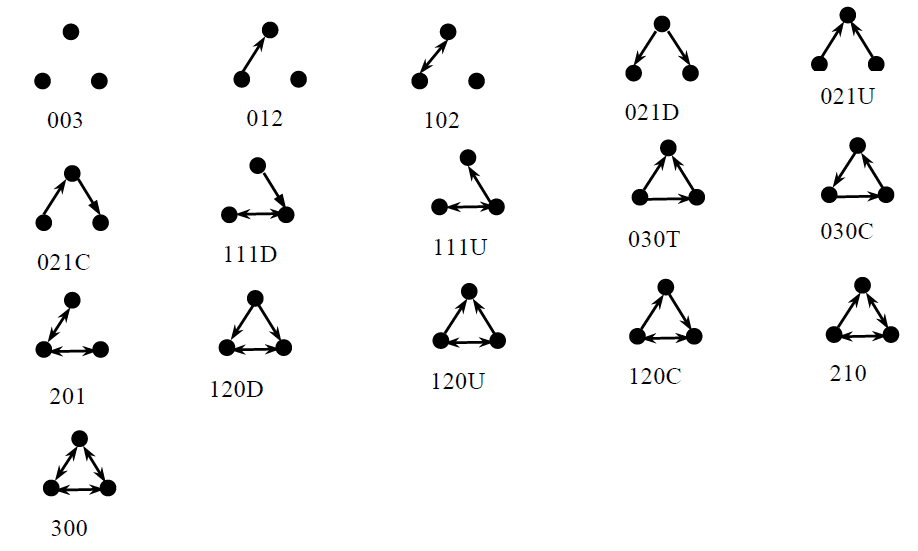

In [62]:
from IPython.display import Image
#credit : Triad censuus Usage for Communication Network Analysis, Zvereva O.M., AIST, April 2016
Image('./Data/TRIAD_NAMES_ref.PNG', width=600,height=100)

Here we want to count only the closed triads, which means three nodes linked to each other. 

Thus it appears that some types of triads previously presented are useless in our count. It is the case for the type 003 (0 edges); 012 and 102 (only 1 edge); 021D, 021U, 021C, 111D and 111U(only 2 edges). 

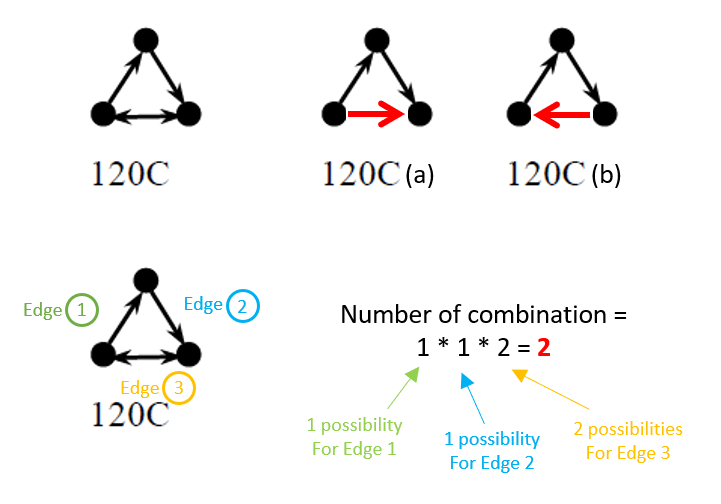

In [63]:
from IPython.display import Image
#credit : Triad censuus Usage for Communication Network Analysis, Zvereva O.M., AIST, April 2016
Image('./Data/Triads_explanations.PNG', width=400,height=100)

On the other hand, the triads with reciprocal edges contain several closed triads according to the number of possible combinations. Let's take an example. 

The triad type 120C has a bottom reciprocal edge. Thus from this 120C triad type, 2 closed triads can be built, according to the direction chosen for the bottom edge (thus 120(a) and 120(b) on the image). So to count the total number of closed triads, we should count two times the 120C value. 
To find the number of combinations associated with a triad type, we can use the multiplication principle: multiply the number of possibilities for each edge. In the case of 120C, the first edge has only one possibility of direction, the second edge also has only one possibility of direction and the third edge has two possibilities of direction (because it is a reciprocal edge). Thus we have : 1x1x2 = 2. We have two combinations possible with this triad type, so we should multiply by two its values to get the total closed triads number. 

If we apply the same logic to the other type of triads we get that in order to have to total number of closed triads we should add : 
- "030C" value
- "030T" value
- "120C" value x 2 (= 1x1x2)
- "120D" value x 2 (= 1x1x2))
- "120U" value x 2 (= 1x1x2)
- "210" value x 4 (= 1x2x2)
- "300" value x 8 (= 2x2x2)

We can convince ourselves of these numbers by drawing all the possible combinations for each triad type. 

Now let's build graph for each of the network, and compute triads.

### Epinion data

--- EPINION Directed graph --- 

First of all, let's build a directed graph for Epinion DataFrame. The directed edges start from "*FromNodeId*" and end at "*ToNodeId*", with "*-1*" associated with the minus sign and "*1*" associated with the positive sign. 

In [64]:
# Epinion : Creation directed graph
Epinion_graph = nx.from_pandas_edgelist(Epinion_values, "FromNodeId", "ToNodeId", ["Sign"], create_using=nx.DiGraph)

Then we check we effectively implemented the right number of edges by comparing the number of edges in the newly build graph and from the general information in the first lines of the raw file. 

In [65]:
# Epinion : Check the number of edges in the graph
if Epinion_graph.number_of_edges() == Epinion_G['Edges'][0]:
    print('Correct number of edges implemented in the graph')
else : 
    print('Incorrect number of edges impleted in the graph ')

Correct number of edges implemented in the graph


Then, applying *triadic_census()* function to the directed graph build, we compute all 16 type possible triads in the graph.

In [66]:
# Epinion : Compute the number of triads 
ct_epi = nx.triadic_census(Epinion_graph)

Then, based on the logic previously described, we compute the sum of the different triad types to have the total number of closed triads in the Epinion Graph.

In [67]:
# Epinion : Compute the total number of closed triads

E_triad_number = ct_epi['030C']+ct_epi['030T']+2*ct_epi['120C']+2*ct_epi['120D']+2*ct_epi['120U']+4*ct_epi['210']+8*ct_epi['300']
print('The total number of triads is {}'.format(E_triad_number))

The total number of triads is 13317672


Finally, we push the result in the Result DataFrame. 

In [105]:
# Complete the Result DataFrame

Result['Epinion']['Triads'] = E_triad_number
Result

,Epinion,Slashdot,Wikipedia
Nodes,131828.0,82144.0,7118.0
Edges,841372.0,549202.0,103747.0
P_edges,85.3,77.4,78.8
N_edges,14.7,22.6,21.2
Triads,13317672.0,0.0,0.0


--- Comparison with paper results --- 

Here we can see that the total number of closed triads found in the Epinion network is 13 317 672, while the value expected from the paper is 13 375 407. The gap represents 0.43% of the expected value. 

This difference is not surprising as we didn't have the exact same number of nodes and edges as the paper. As a reminder, we get 131828 nodes and 841 372 edges while the paper shows 119 217 nodes (gap: 10.6%) and 841 200 edges (gap: 0.02%). As we don't have exactly the same nodes and edges, it is normal that the resulting graph doesn't have exactly the same structure. However the differences are quite small, and the results obtained with our method have the same magnitude order as the ones from the study. 
So the difference in the selection of nodes (involvement or not in edges, in triads...) may be the source of the difference but as said before, we didn't find clear choices about that in the paper. 
What we have done was basic common sense analysis with the tips given in the paper. 

 ### Slashdot data

--- SLASHDOT Directed Graph --- 

As before, let's buit a directed graph for Slashdot DataFrame. As Slashdot and Epinion DataFrame have the same structure, the construction of the edges is similar : directed from "*FromNodeId*" to "*ToNodeId*", as positive if the sign is "*1*" and negative if "*-1*".

In [69]:
# Slashdot : Creation directed graph
Slashdot_graph = nx.from_pandas_edgelist(Slashdot_values, "FromNodeId", "ToNodeId", ["Sign"], create_using=nx.DiGraph)

Then we check if the graph was correctly implemented by verifying the number of edges.

In [70]:
# Slashdot : Check the number of edges in the graph
if Slashdot_graph.number_of_edges() == Slashdot_G['Edges'][0]:
    print('Correct number of edges implemented in the graph')
else : 
    print('Incorrect number of edges impleted in the graph ')

Correct number of edges implemented in the graph


Then, we apply *triadic_census()* function to obtain the count of all possible triads for the 16 triad types in the slashdot network

In [71]:
# Slashdot : Compute the number of triads 
ct_slash = nx.triadic_census(Slashdot_graph)

Based on the previous logic of triad selection and mutliplication factor, we compute the total number of closed triads in Slashdot graph.

In [72]:
# Slashdot : Compute the total number of closed triads

S_triad_number = ct_slash['030C']+ct_slash['030T']+2*ct_slash['120C']+2*ct_slash['120D']+2*ct_slash['120U']+4*ct_slash['210']+8*ct_slash['300']
print('The total number of triads is {}'.format(S_triad_number))

The total number of triads is 1508105


Finally we push the result in the Result DataFrame. 

In [106]:
# Complete the Result DataFrame
Result['Slashdot']['Triads'] = S_triad_number
Result

,Epinion,Slashdot,Wikipedia
Nodes,131828.0,82144.0,7118.0
Edges,841372.0,549202.0,103747.0
P_edges,85.3,77.4,78.8
N_edges,14.7,22.6,21.2
Triads,13317672.0,1508105.0,0.0


--- Comparison with paper results --- 

Here we can see that we have found 1 508 105 closed triads in the Slashdot graph, which is exactly the number expected from the paper. As we have the same number of nodes and edges, as well as the same percentages of positive and negative edges, one could say that we have the same network as the one used in the paper. The fact that we finally find the same number of triads ensure the logic we used in counting closed triads (multiplication factor of triad types). 
So it gives an even better degree of security to the other results. 

### Wikipedia Admin votes

--- WIKIPEDIA Directed Graph --- 

As for the other networks, we will first create a directed graph. 
However here, we want to create a graph with only the positive and negative votes, the neutral ones are considered as no link because they don't mean anything between the users (no support, not against). Also, we have seen in the nodes number and percentages analysis that the paper gets rid of them in its study. 

So here we will use the previously created "*Wiki_copy*" DataFrame which is a copy of the original votes DataFrame but without the neutral votes.

First, let's  build the direct graph for wikipedia admin votes. As explained before the links will be directed from the voters ("*ID_voter*") to the candidate ("*ID_candidate*"), using "*1" as positive and "-1" as negative sign. 

In [108]:
# Wikipedia : Creation of directed graph
Wiki__graph_nn = nx.from_pandas_edgelist(Wiki_copy, "ID_voter", "ID_candidate", ["Sign"], create_using=nx.DiGraph)

Then we check if the graph was correctly implemented by verifying the number of edges.

In [112]:
# Wikipedia : Check the number of edges in the graph
if Wiki__graph_nn.number_of_edges() == Result['Wikipedia']['Edges']:
    print('Correct number of edges implemented in the graph')
else : 
    print('Incorrect number of edges impleted in the graph ')

Correct number of edges implemented in the graph


Then we compute the possible triads with "*triadic_census()*" function. 

In [113]:
# Wikipedia : Compute the number of triads 

ct_Wiki_nn = nx.triadic_census(Wiki__graph_nn)

Then we use the same logic previously described to calculate the total number of closed triads in wikipedia network.

In [114]:
# Wikipedia : Compute the total number of closed triads

W_triad_number_nn = ct_Wiki_nn['030C']+ct_Wiki_nn['030T']+2*ct_Wiki_nn['120C']+2*ct_Wiki_nn['120D']+2*ct_Wiki_nn['120U']+4*ct_Wiki_nn['210']+8*ct_Wiki_nn['300']
print('The total number of triads is {}'.format(W_triad_number_nn))

The total number of triads is 790532


Finally we add the result to the Result DataFrame

In [116]:
# Complete the Result DataFrame

Result['Wikipedia']['Triads'] = W_triad_number_nn
Result

,Epinion,Slashdot,Wikipedia
Nodes,131828.0,82144.0,7118.0
Edges,841372.0,549202.0,103747.0
P_edges,85.3,77.4,78.8
N_edges,14.7,22.6,21.2
Triads,13317672.0,1508105.0,790532.0


--- Comparison with paper results ---

Here we can see that we have found 790 532 triads in Wikipedia network, which is **exactly the number expected from the paper**. 

All along the computational work done here, we have seen that the study ignored neutral and duplicated votes. Using this selection on the netwrok, we were able to finally get the same total number of edges and nodes as well as very close percentage of + and - edges. So we can say that the dataset we are working on is very close to the one used in the study. Thus it is not surprising to get the same number of triads for a graph built on this network. However, we are still happy of this conclusion!

 ## Conclusion

To conclude, the work presented here reflects the way of thinking we have been through reading and re-computing the paper. Finally, we get similar results, or very closed ones (the error gaps are acceptable). Also, our results lead to the same conclusion as the paper: ***The three networks have ten to hundreds of thousand nodes and less than a million edges***. The ***percentage of positive edges is around 80% for the three networks***. The ***number of triads is quite different for the three data set***. The ***lowest one is associated with Wikipedia*** which is not surprising as the links are related to votes and not spontaneous links between users. 

Also, we have seen that selection has been made on Wikipedia dataset: neither neutral nor reciprocal votes are taken into account in the study. It might be important to keep it in mind, as the count of duplicated votes (positive or negative) may be a way to weight the links between users. Also, the neutral votes might be important as it reveals that someones is not for or against a nomination, but is concerned by the questions. These are a few avenues that we could explore in the continuation of the analysis, and that allows us to take a step back and nuance the results that we give here. 

The Result DataFrame and all the DataFrames created along this study with the three network information are now ready to continue the analysis! 